# HAND WRITTEN DIGITS RECOGNITION

In [1]:
# IMPORTING THE LIBRARIES

import tensorflow as tf
import numpy as np
from keras.datasets import mnist
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# LOADING THE DATA

(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [3]:
x_train.shape, x_test.shape

((60000, 28, 28), (10000, 28, 28))

In [4]:
x_train[0].shape

(28, 28)

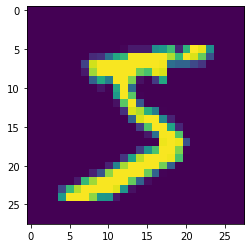

In [5]:
plt.imshow(x_train[0])

In [6]:
y_train[0]

5

# BUILDING THE MODEL

In [7]:

# INITIALISING THE ANN
model = tf.keras.models.Sequential([
                                    
                                    # FLATTENING THE DATA
                                    tf.keras.layers.Flatten(),

                                    #FIRST HIDDEN LAYER
                                    tf.keras.layers.Dense(units=256, activation='relu'),

                                    # SECOND HIDDEN LAYER
                                    tf.keras.layers.Dense(units=256, activation='relu'),

                                    #OUTPUT LAYER
                                    tf.keras.layers.Dense(units=10, activation='softmax')
])

In [8]:
# COMPILING THE ANN

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [9]:
# TRAINING THE MODEL ON TRAIN SET AND EVALUATING ON TEST SET

model.fit(x_train, y_train, batch_size=256, epochs = 15, validation_data=(x_test, y_test))

Epoch 1/15
235/235 [==============================] - 2s 4ms/step - loss: 12.4010 - accuracy: 0.7727 - val_loss: 0.8392 - val_accuracy: 0.9238
Epoch 2/15
235/235 [==============================] - 1s 2ms/step - loss: 0.5126 - accuracy: 0.9409 - val_loss: 0.6127 - val_accuracy: 0.9334
Epoch 3/15
235/235 [==============================] - 1s 2ms/step - loss: 0.2437 - accuracy: 0.9608 - val_loss: 0.5401 - val_accuracy: 0.9390
Epoch 4/15
235/235 [==============================] - 1s 3ms/step - loss: 0.1567 - accuracy: 0.9714 - val_loss: 0.4221 - val_accuracy: 0.9528
Epoch 5/15
235/235 [==============================] - 1s 2ms/step - loss: 0.1154 - accuracy: 0.9771 - val_loss: 0.4495 - val_accuracy: 0.9517
Epoch 6/15
235/235 [==============================] - 1s 3ms/step - loss: 0.1000 - accuracy: 0.9807 - val_loss: 0.4079 - val_accuracy: 0.9554
Epoch 7/15
235/235 [==============================] - 1s 3ms/step - loss: 0.0847 - accuracy: 0.9837 - val_loss: 0.4425 - val_accuracy: 0.9566
Epoch

In [10]:
# MAKING PREDICTION

y_pred=model.predict(x_test)
y_pred = [np.argmax(i) for i in y_pred]

0.9604
              precision    recall  f1-score   support

           0       0.97      0.98      0.98       980
           1       0.98      0.99      0.99      1135
           2       0.96      0.94      0.95      1032
           3       0.96      0.96      0.96      1010
           4       0.96      0.95      0.96       982
           5       0.97      0.94      0.96       892
           6       0.97      0.97      0.97       958
           7       0.94      0.96      0.95      1028
           8       0.94      0.95      0.94       974
           9       0.94      0.95      0.94      1009

    accuracy                           0.96     10000
   macro avg       0.96      0.96      0.96     10000
weighted avg       0.96      0.96      0.96     10000



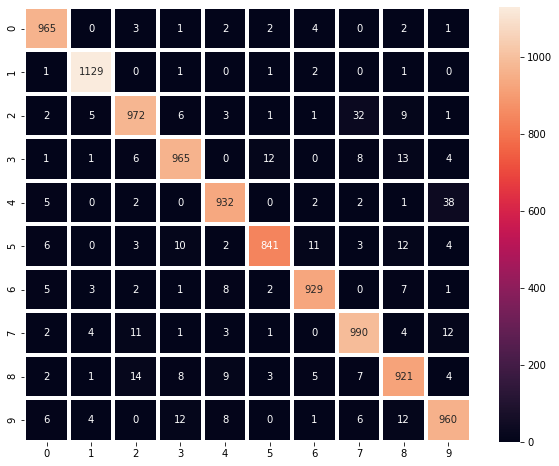

In [11]:
# PLOTTING CONFUSION MATRIX

from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

print(accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

cm=confusion_matrix(y_test, y_pred)

plt.figure(figsize=(10,8))
sns.heatmap(cm, annot=True, lw=3, fmt='d')